# Hierarichal Clustering on Iris Dataset

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
%matplotlib inline

In [44]:
iris = load_iris()

In [45]:
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

In [46]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

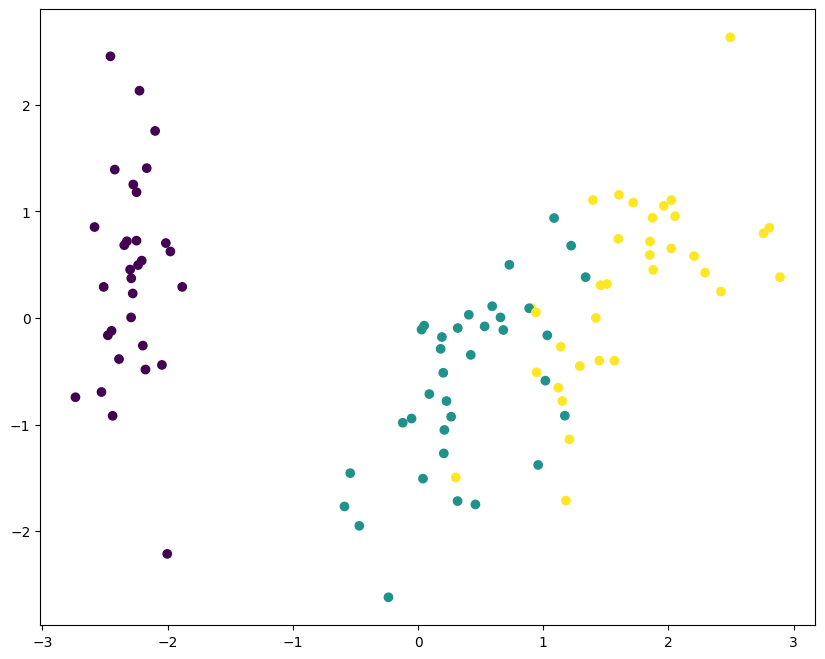

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

Text(0, 0.5, 'Distance')

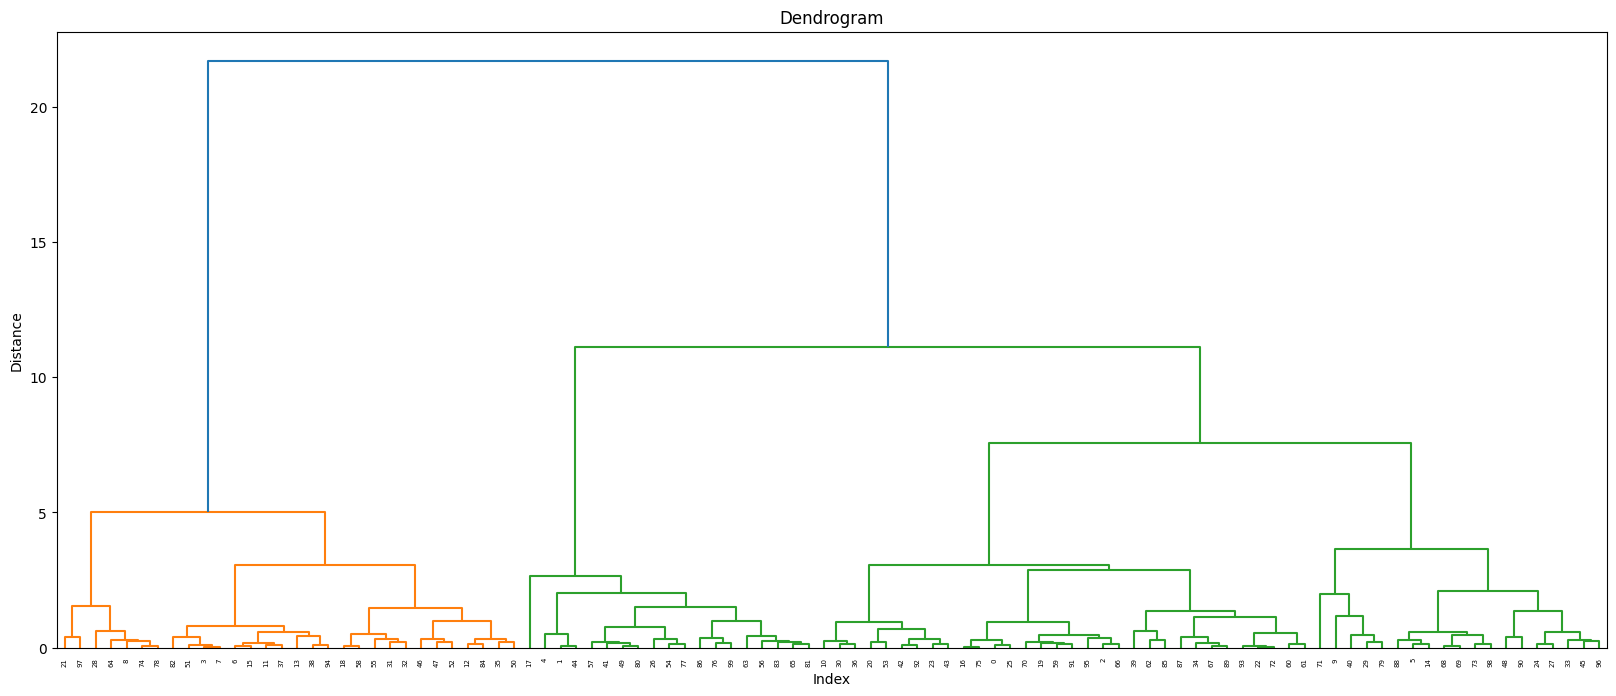

In [56]:
plt.figure(figsize=(20,8))
shc.dendrogram(shc.linkage(x_train_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

In [58]:
model = AgglomerativeClustering(n_clusters=3,linkage="ward",metric="euclidean")
model.fit(x_train_pca)

AgglomerativeClustering(n_clusters=3)

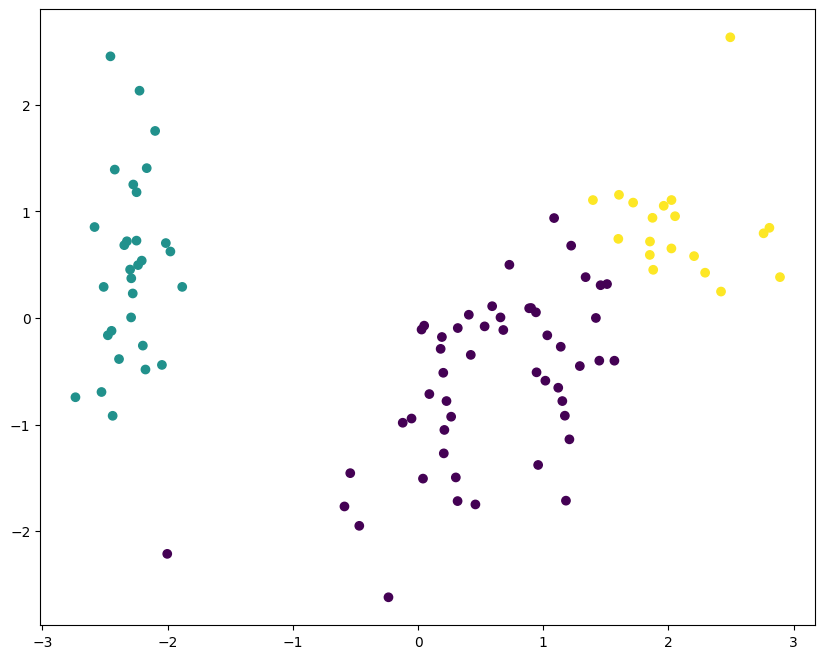

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=model.labels_)